<a href="https://colab.research.google.com/github/gcarmonav/gcarmonav.github.io/blob/main/Optimizacion_pauta_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Actividad 05: Optimizando la pauta digital
Por:

Giovanna Carmona Valencia

Hilber García López

##Indice
- Planteamiento del problema

- Resultados

- Referencias

##Planteamiento del problema

La plataforma digital de servicios QUIX quiere atraer más usuarios. Para ello invertirá en pauta digital. La pauta digital permite configurar las horas en la que las diferentes redes sociales le mostrarán los anuncios de la plataforma a los potenciales usuarios. 


Se ha recogido información sobre datos de conexión de usuarios en un periodo de tiempo. De acuerdo con esta información, ¿cómo debería distribuir su presupuesto de pauta digital la compañía?


##Importación de librerias

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import Series
import matplotlib.pyplot as plt

## Base de datos

In [32]:
# Importar la librería de Drive en Colab y montar la unidad.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
dataset = pd.read_csv('/content/drive/MyDrive/Actividad_05_Optimizacion/datos_horas_conexion.csv', sep=';',decimal=',')

In [34]:
dataset.head()

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario
0,c2290d89dfc4,Buró de Crédito,gmail.com,19/01/21 9:20,ACTIVO
1,8d24ef1d52d8,Buró de Crédito,gmail.com,19/01/21 8:28,ACTIVO
2,a5120d2c47fa,Buró de Crédito,gmail.com,17/01/21 13:36,ACTIVO
3,5a5d70893606,Buró de Crédito,edubc.mx,20/01/21 9:27,ACTIVO
4,4a2082948031,Buró de Crédito,gmail.com,21/01/21 14:26,ACTIVO


In [35]:
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_usuario      4022 non-null   object
 1   Calificadora    4022 non-null   object
 2   Correo          4003 non-null   object
 3   Fecha Consulta  4022 non-null   object
 4   Estado usuario  4003 non-null   object
dtypes: object(5)
memory usage: 157.2+ KB


,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario
count,4022,4022,4003,4022,4003
unique,3681,1,93,3442,3
top,fdcc844fb3b0,Buró de Crédito,gmail.com,21/01/21 20:24,ACTIVO
freq,66,4022,2812,4,3602


In [36]:
dataset['Fecha Consulta'] = pd.to_datetime(dataset['Fecha Consulta'])
dataset.head()

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario
0,c2290d89dfc4,Buró de Crédito,gmail.com,2021-01-19 09:20:00,ACTIVO
1,8d24ef1d52d8,Buró de Crédito,gmail.com,2021-01-19 08:28:00,ACTIVO
2,a5120d2c47fa,Buró de Crédito,gmail.com,2021-01-17 13:36:00,ACTIVO
3,5a5d70893606,Buró de Crédito,edubc.mx,2021-01-20 09:27:00,ACTIVO
4,4a2082948031,Buró de Crédito,gmail.com,2021-01-21 14:26:00,ACTIVO


Con el fin de determinar las características del dataset, se utiliza la columna de 'Fecha Consulta', se lee como un tipo de dato datetime, se coloca como índice y se extraen sus principales características como día, mes, nombre de día, semana y hora.

In [37]:
dataset['fecha']=dataset['Fecha Consulta']

In [38]:
# Se coloca la columna Fecha Consulta como índice
dataset.set_index('Fecha Consulta', drop=True, inplace=True)


In [39]:
# se extraen las características de la fecha de consulta
dataset['day'] = [i.day for i in dataset.index]
dataset['day_name'] = [i.day_name() for i in dataset.index]
dataset['week_of_year'] = [i.weekofyear for i in dataset.index]
dataset['hour'] = [i.hour for i in dataset.index]
dataset['is_weekday'] = [i.isoweekday() for i in dataset.index]
dataset.head()

,id_usuario,Calificadora,Correo,Estado usuario,fecha,day,day_name,week_of_year,hour,is_weekday
Fecha Consulta,,,,,,,,,,
2021-01-19 09:20:00,c2290d89dfc4,Buró de Crédito,gmail.com,ACTIVO,2021-01-19 09:20:00,19,Tuesday,3,9,2
2021-01-19 08:28:00,8d24ef1d52d8,Buró de Crédito,gmail.com,ACTIVO,2021-01-19 08:28:00,19,Tuesday,3,8,2
2021-01-17 13:36:00,a5120d2c47fa,Buró de Crédito,gmail.com,ACTIVO,2021-01-17 13:36:00,17,Sunday,2,13,7
2021-01-20 09:27:00,5a5d70893606,Buró de Crédito,edubc.mx,ACTIVO,2021-01-20 09:27:00,20,Wednesday,3,9,3
2021-01-21 14:26:00,4a2082948031,Buró de Crédito,gmail.com,ACTIVO,2021-01-21 14:26:00,21,Thursday,3,14,4


Dado que para determinar la inversión en publicidad podría ser necesario establecer la plataforma o dominios habituales de correo, se depura el texto contenido en la columna de Correo, para esto se encuentran cuentas de correo con mayúscula, con números y con diferentes formatos, se unifica el formato y se deja sólo el dominio.

Posteriormente se cambian los correo mal escritas y se unifican las de menor frecuencia en una categoría de 'otros'.

In [40]:
# se unifican los correos, se cambian las mayusuculas a minusculas
dataset['Correo'] = dataset.Correo.str.lower()

# Se separa el dominio del correo
dataset['Correo'] = (dataset['Correo'].str.split('[.@]', expand=True)).astype(str)

#Se eliminan los números del dominio del correo
dataset['Correo'] = dataset.Correo.str.replace(r"[0-9]",'')

In [41]:
dataset.head(10)

,id_usuario,Calificadora,Correo,Estado usuario,fecha,day,day_name,week_of_year,hour,is_weekday
Fecha Consulta,,,,,,,,,,
2021-01-19 09:20:00,c2290d89dfc4,Buró de Crédito,gmail,ACTIVO,2021-01-19 09:20:00,19,Tuesday,3,9,2
2021-01-19 08:28:00,8d24ef1d52d8,Buró de Crédito,gmail,ACTIVO,2021-01-19 08:28:00,19,Tuesday,3,8,2
2021-01-17 13:36:00,a5120d2c47fa,Buró de Crédito,gmail,ACTIVO,2021-01-17 13:36:00,17,Sunday,2,13,7
2021-01-20 09:27:00,5a5d70893606,Buró de Crédito,edubc,ACTIVO,2021-01-20 09:27:00,20,Wednesday,3,9,3
2021-01-21 14:26:00,4a2082948031,Buró de Crédito,gmail,ACTIVO,2021-01-21 14:26:00,21,Thursday,3,14,4
2021-01-18 16:13:00,41a54ce08fae,Buró de Crédito,oitlook,ACTIVO,2021-01-18 16:13:00,18,Monday,3,16,1
2021-01-18 23:26:00,4573f1a633dc,Buró de Crédito,hotmail,ACTIVO,2021-01-18 23:26:00,18,Monday,3,23,1
2021-01-19 09:22:00,91651bd6cdc6,Buró de Crédito,hotmail,ACTIVO,2021-01-19 09:22:00,19,Tuesday,3,9,2
2021-08-01 23:00:00,0b529b9ea957,Buró de Crédito,gmail,ACTIVO,2021-08-01 23:00:00,1,Sunday,30,23,7


In [42]:
#Se saca una lista de los dominios de correo
dataset['Correo'].unique()

array(['gmail', 'edubc', 'oitlook', 'hotmail', 'outlook', 'yahoo', 'me',
       'live', 'nan', 'ittepic', 'sohe', 'multiva', 'hotmai',
       'avantservices', 'icloud', 'liverpool', 'gmeil', 'telefonica',
       'msn', 'hotmil', 'mail', 'hormail', 'gtelecom', 'mx', 'saetowers',
       'tec', 'hotmaol', 'gotmail', 'yomax', 'suramexico', 'g', 'hitmail',
       'exatec', 'jotmail', 'gitsmfg', 'sermatel', 'prodigy', 'gmal',
       'gmai', 'bbva', 'gamil', 'madisa', 'hutchinson-seal-mexico',
       'olxautos', 'gnail', 'gmil', 'osiux', 'yansa', 'aefcm', 'hatmail',
       'gimail', 'ymail', 'prodyaut', 'cfe', 'guanajuato', 'riconsa',
       'gmaim', 'hot', 'occidente', 'outlok', 'test'], dtype=object)

In [43]:
#se unifican los dominios mal escritos
dataset = dataset.replace(to_replace=['gmeil', 'gmal', 'gmai','gamil','gnail','gmil', 'gimail', 'ymail', 'gmaim'], value=['gmail','gmail','gmail','gmail','gmail','gmail','gmail','gmail','gmail'])
dataset = dataset.replace(to_replace=['hotmai', 'hotmil', 'hormail','hotmaol','gotmail','hitmail', 'jotmail', 'hatmail','hot'], value=['hotmail','hotmail','hotmail','hotmail','hotmail','hotmail','hotmail','hotmail','hotmail'])
dataset = dataset.replace(to_replace=['oitlook', 'outlok'], value=['outlook','outlook'])

In [44]:
dataset['Correo'].unique()

array(['gmail', 'edubc', 'outlook', 'hotmail', 'yahoo', 'me', 'live',
       'nan', 'ittepic', 'sohe', 'multiva', 'avantservices', 'icloud',
       'liverpool', 'telefonica', 'msn', 'mail', 'gtelecom', 'mx',
       'saetowers', 'tec', 'yomax', 'suramexico', 'g', 'exatec',
       'gitsmfg', 'sermatel', 'prodigy', 'bbva', 'madisa',
       'hutchinson-seal-mexico', 'olxautos', 'osiux', 'yansa', 'aefcm',
       'prodyaut', 'cfe', 'guanajuato', 'riconsa', 'occidente', 'test'],
      dtype=object)

In [45]:
#se validan los dominios 
dataset.Correo.value_counts().sort_index()


aefcm                        1
avantservices                1
bbva                         1
cfe                          1
edubc                        1
exatec                       1
g                            3
gitsmfg                      1
gmail                     2850
gtelecom                     1
guanajuato                   1
hotmail                    845
hutchinson-seal-mexico       1
icloud                       7
ittepic                      1
live                        56
liverpool                    4
madisa                       1
mail                         3
me                           4
msn                          7
multiva                      1
mx                           3
nan                         19
occidente                    1
olxautos                     1
osiux                        1
outlook                    144
prodigy                      1
prodyaut                     1
riconsa                      1
saetowers                    1
sermatel

In [46]:
#Se unifican los correos con una frecuencia de 1 y 2 en la categoria otros
dic_replace = {'aefcm': 'otros',
               'avantservices': 'otros',
               'bbva': 'otros',
               'cfe': 'otros',
               'edubc': 'otros',
               'exatec': 'otros',
               'gitsmfg': 'otros',
               'gtelecom': 'otros',
               'guanajuato': 'otros',
               'hutchinson-seal-mexico': 'otros',
               'ittepic': 'otros',
               'madisa': 'otros',
               'multiva': 'otros',
               'occidente': 'otros',
               'olxautos': 'otros',
               'osiux': 'otros',
               'prodigy': 'otros',
               'prodyaut': 'otros',
               'riconsa': 'otros',
               'saetowers': 'otros',
               'sermatel': 'otros',
               'sohe': 'otros',
               'tec': 'otros',
               'telefonica': 'otros',
               'test': 'otros',
               'yansa': 'otros',
               'yomax': 'otros'}

dataset['Correo'] = dataset['Correo']\
                    .map(dic_replace) \
                    .fillna(dataset['Correo'])
 

In [47]:
#Se observan cuales dominios quedaron
dataset.Correo.value_counts().sort_index()

g                3
gmail         2850
hotmail        845
icloud           7
live            56
liverpool        4
mail             3
me               4
msn              7
mx               3
nan             19
otros           28
outlook        144
suramexico       4
yahoo           45
Name: Correo, dtype: int64

In [48]:
print(dataset.columns.tolist())

['id_usuario', 'Calificadora', 'Correo', 'Estado usuario', 'fecha', 'day', 'day_name', 'week_of_year', 'hour', 'is_weekday']


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4022 entries, 2021-01-19 09:20:00 to 2021-01-17 20:59:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_usuario      4022 non-null   object        
 1   Calificadora    4022 non-null   object        
 2   Correo          4022 non-null   object        
 3   Estado usuario  4003 non-null   object        
 4   fecha           4022 non-null   datetime64[ns]
 5   day             4022 non-null   int64         
 6   day_name        4022 non-null   object        
 7   week_of_year    4022 non-null   int64         
 8   hour            4022 non-null   int64         
 9   is_weekday      4022 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 345.6+ KB


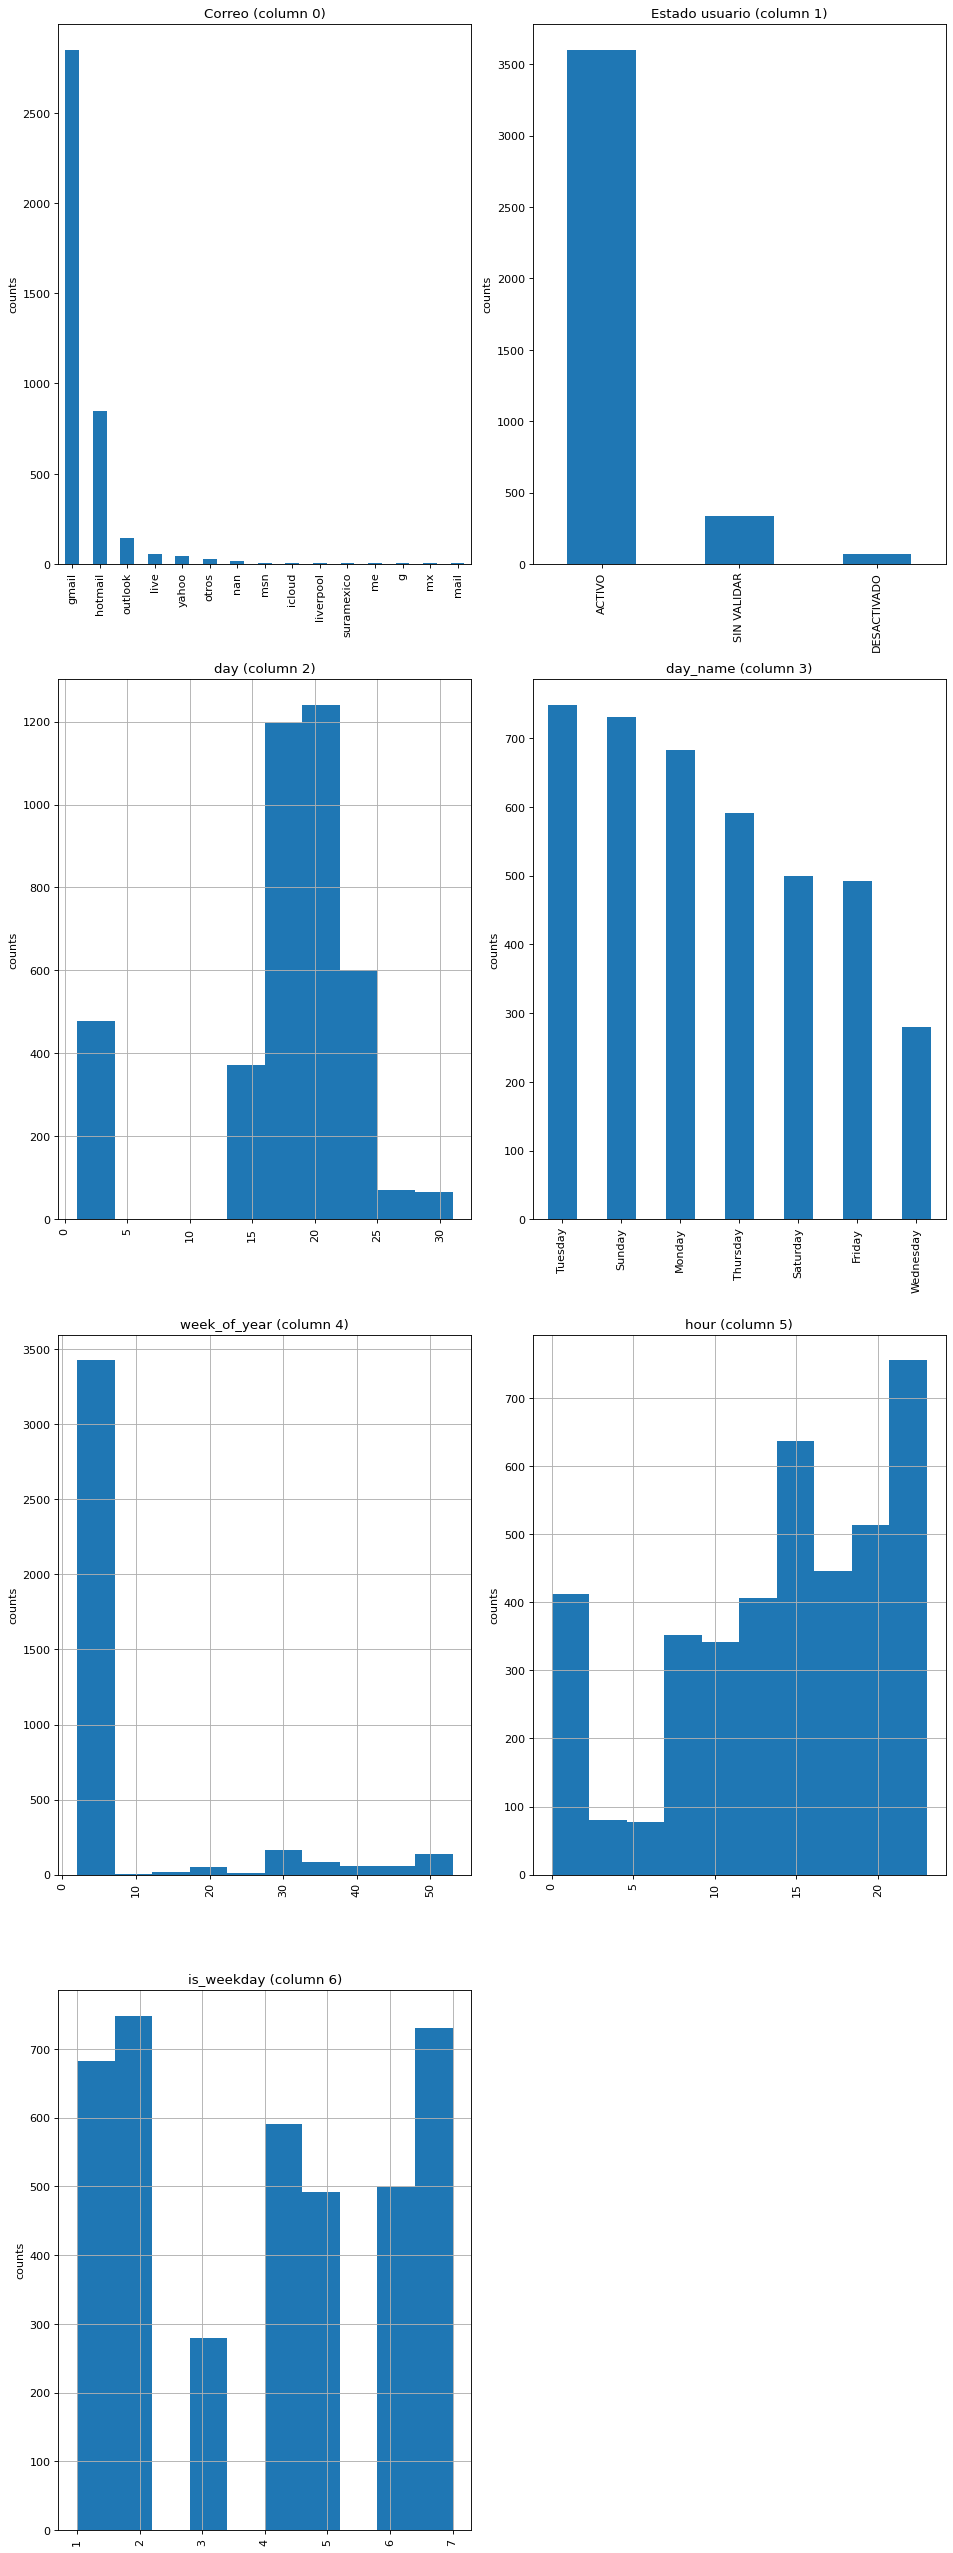

None


In [50]:
# Se grafica cada columna de la base de datos, con el fin de establecer su distribución

def plotPerColumnDistribution(dataset, nGraphShown, nGraphPerRow):
    nunique = dataset.nunique()
    dataset = dataset[[col for col in dataset if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = dataset.shape
    columnNames = list(dataset)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = dataset.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

print(plotPerColumnDistribution(dataset, 10, 2))


Con base en las anteriores gráficas se observa:

- Cerca del 71% de los correos corresponden al dominio gmail, seguido de hotmail y outlook con el 21% y 3.59%, respectivamente. Por lo tanto si la publicidad de puede enfocar en los dominios de correo, la recomendación es enfocarla en gmail principalmente.

- El 90% de los usuarios se encuentran activos, mientras que un 8% se encuentra sin validar y el 2% restante se encuentra desactivado.

- La mayoria de los datos se concentra en los días comprendidos entre el 14 y el 24 del mes, cerca del 84% se encuentra en este rango, si bien puede ser prematuro dar una conclusión pues la información corresponde a sólo dos meses, se puede recomendar enfocar la inversión en publicidad la tercera y cuarta semana de la semana.

- Se observa que los días de mayor tráfico son el jueves con un 18.54% de los usuarios, el domingo con un 18,1% y lunes con el 16.91%, por su parte, el día con menor tráfico es fue el muercoles con el 7% del total de los usuarios. De acuerdo con esto es necesario enfocar la pauta publicitaria en los día jueves, domingo y lunes de mayor tráfico.

In [51]:
hour = []
for x in range(0,24):
    hour.append(x)
    
agg_hour = dataset.groupby(['hour'], as_index = False)['id_usuario'].count()

print(agg_hour)

    hour  id_usuario
0      0         203
1      1         130
2      2          79
3      3          47
4      4          34
5      5          28
6      6          49
7      7          73
8      8         125
9      9         154
10    10         177
11    11         165
12    12         212
13    13         194
14    14         192
15    15         222
16    16         223
17    17         228
18    18         218
19    19         267
20    20         247
21    21         280
22    22         270
23    23         205


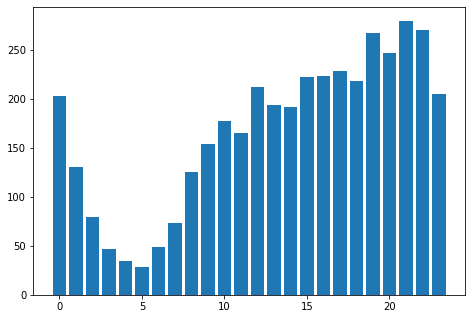

In [52]:
#Se grafica la distribución de los usuarios conectados por hora
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(agg_hour['hour'],agg_hour['id_usuario'])
plt.show()

De acuerdo a la distribución de los usuarios por hora, se observa que de manera general las horas de mayor tráfico son las 9 p.m. con un 6.96% del total de usuarios, las 10 p.m. con un 6.71% y las 7 p.m con un 6.64%. 

Por su parte el horario con menor tráfico es el comprendido entre las 2 a.m y las 5 a.m., este último es el menor sólo con un 0.70%.

In [53]:
# Se agrupa la información por día y se suma el número de usuarios conectados
agg_day = dataset.groupby(['day_name'], as_index = False)['id_usuario'].count()
print(agg_day)


    day_name  id_usuario
0     Friday         492
1     Monday         682
2   Saturday         499
3     Sunday         730
4   Thursday         591
5    Tuesday         748
6  Wednesday         280


In [54]:
# Se agrupa la información por día y se suma el número de usuarios conectados
agg_wday = dataset.groupby(['is_weekday'], as_index = False)['id_usuario'].count()
print(agg_wday)


   is_weekday  id_usuario
0           1         682
1           2         748
2           3         280
3           4         591
4           5         492
5           6         499
6           7         730


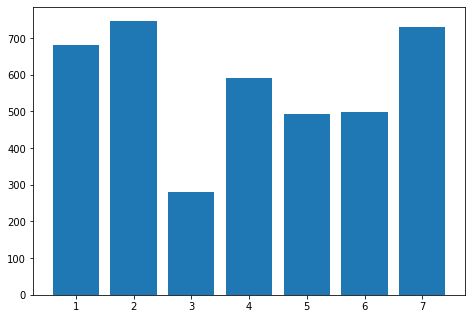

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(agg_wday['is_weekday'],agg_wday['id_usuario'])
plt.show()

In [56]:
# # Se agrupa la información por día, pero teniendo en cuenta el día de la semana y se suma el número de usuarios conectados
agg_hday = dataset.groupby(['is_weekday', 'hour'], as_index = False)['id_usuario'].count()
print(agg_hday)


     is_weekday  hour  id_usuario
0             1     0          26
1             1     1          24
2             1     2          11
3             1     3           7
4             1     4           3
..          ...   ...         ...
163           7    19          46
164           7    20          42
165           7    21          51
166           7    22          36
167           7    23          35

[168 rows x 3 columns]


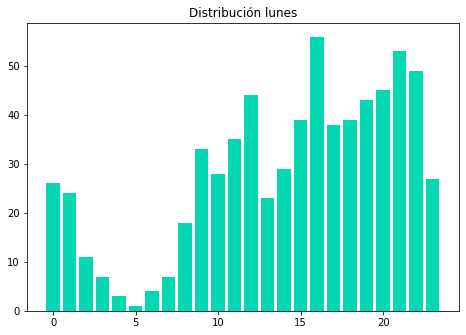

In [80]:
#Se grafican los usuarios conectados en el día lunes

lunes = agg_hday[agg_hday.is_weekday == 1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(lunes['hour'],lunes['id_usuario'],  color='#04D8B2')
plt.title('Distribución lunes') 
plt.show()

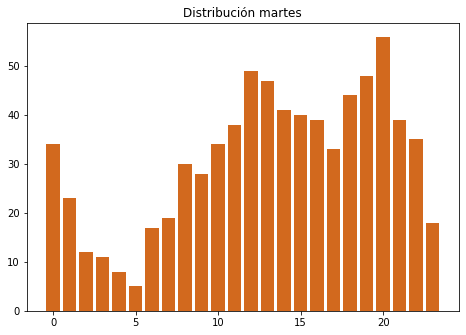

In [75]:
#Se grafican los usuarios conectados en el día martes

martes = agg_hday[agg_hday.is_weekday == 2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(martes['hour'], martes['id_usuario'], color='#D2691E')
plt.title('Distribución martes') 
plt.show()

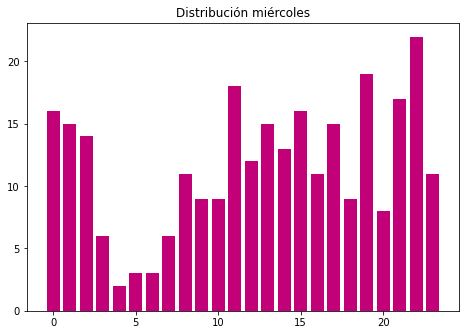

In [76]:
#Se grafican los usuarios conectados en el día miércoles

miercoles = agg_hday[agg_hday.is_weekday == 3]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(miercoles['hour'],miercoles['id_usuario'],  color='#C20078')
plt.title('Distribución miércoles') 
plt.show()

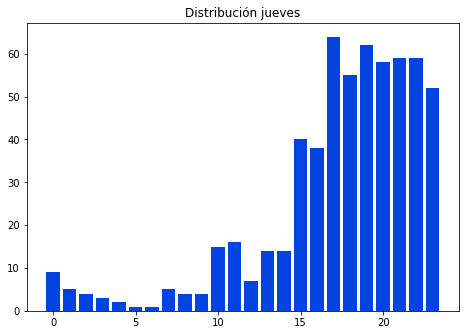

In [77]:
#Se grafican los usuarios conectados en el día jueves

jueves = agg_hday[agg_hday.is_weekday == 4]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(jueves['hour'],jueves['id_usuario'],  color='#0343DF')
plt.title('Distribución jueves') 
plt.show()

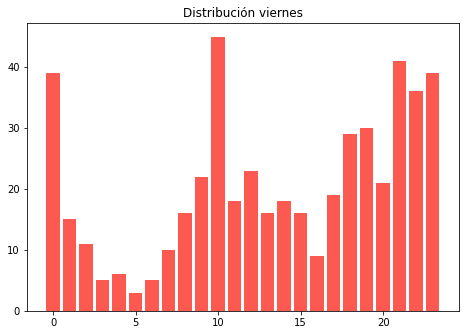

In [78]:
#Se grafican los usuarios conectados en el día viernes

viernes = agg_hday[agg_hday.is_weekday == 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(viernes['hour'],viernes['id_usuario'],  color='#FC5A50')
plt.title('Distribución viernes') 
plt.show()

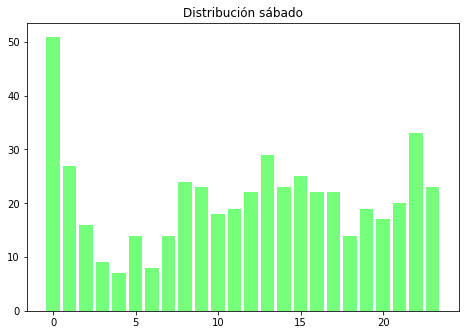

In [82]:
#Se grafican los usuarios conectados en el día sabado

sabado = agg_hday[agg_hday.is_weekday == 6]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sabado['hour'],sabado['id_usuario'],  color='#76FF7B')
plt.title('Distribución sábado') 
plt.show()

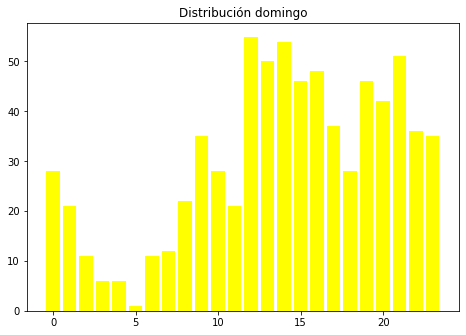

In [83]:
#Se grafican los usuarios conectados en el día domingo

domingo = agg_hday[agg_hday.is_weekday == 7]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(domingo['hour'], domingo['id_usuario'],  color='#FFFF00')
plt.title('Distribución domingo') 
plt.show()

Adicionalmente, de acuerdo a la distribución de tráfico por día y por hora en la definición de la pauta publicitaria se recomienda tener en cuenta los siguientes aspectos:

- El mayor tráfico el lunes se presenta a las 4 p.m., las 9 p.m. y las 10 p.m.

- El día martes las horas de mayor tráfico son las 8 p.m, 12 m, 1 p.m. y 7 p.m.

- El miércoles las horas con mayor tráfico son las 10 p.m., las 7 p.m. y 11 a.m.

- El jueves, las horas de mayor tráfico son las comprendidas entre las 5 p.m. y las 11 p.m.

- El viernes, las horas de mayor tráfico son las 10 a.m., las 9 p.m. y las 12 p.m.

- El sábado las horas con mayor tráfico son las 12 p.m. y las 10 p.m.

- El domingo las horas de mayor tráfico son las horas comprendidas entre las 12 p.m. y las 4 p.m. y las 9 p.m.